<img align="right" src="images/tf-small.png"/>

# Senses

We visualize the distribution of *sense labels* of verb occurrences, where verb occurrences select senses that depend on the number and nature of key constituents in their context.

The verbal sense data has been computed in the 
[flowchart notebook](https://github.com/ETCBC/valence/blob/master/notebooks/flowchart.ipynb).

In this notebook we show how to make use of that data.

For more information about the flowchart computations and the results, 
read the [wiki](https://github.com/ETCBC/valence/wiki/Workflows).

Or go straight to the [legend](https://github.com/ETCBC/valence/wiki/Legend) of the sense labels.

## Authors

[Janet Dyk and Dirk Roorda](https://github.com/ETCBC/valence/wiki/Authors)

Last modified 2017-09-13.

## Data
We carry out the valence project against the Hebrew Text Database of the ETCBC, version 4b.
See the description of the [sources](https://github.com/ETCBC/valence/wiki/Sources).

In [1]:
import collections
from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib inline

import pandas
pandas.set_option('display.notebook_repr_html', True)
from tf.fabric import Fabric

In [2]:
source = 'etcbc'
version = '4b'

In [3]:
ETCBC = f'hebrew/{source}{version}'
VALENCE = f'tf/{version}'
TF = Fabric(locations=['~/github/text-fabric-data-legacy', '~/github/valence'], modules=[ETCBC, VALENCE])

This is Text-Fabric 2.3.10
Api reference : https://github.com/ETCBC/text-fabric/wiki/Api
Tutorial      : https://github.com/ETCBC/text-fabric/blob/master/docs/tutorial.ipynb
Data sources  : https://github.com/ETCBC/text-fabric-data
Data docs     : https://etcbc.github.io/text-fabric-data
Shebanq docs  : https://shebanq.ancient-data.org/text
Slack team    : https://shebanq.slack.com/signup
Questions? Ask shebanq@ancient-data.org for an invite to Slack
121 features found and 0 ignored


In [13]:
api = TF.load('''
    sp vs
    lex gloss
    predication sense
''')
api.makeAvailableIn(globals())

  0.00s loading features ...
   |     0.10s B predication          from /Users/dirk/github/valence/tf/4b
   |     0.00s Feature overview: 115 for nodes; 5 for edges; 1 configs; 7 computed
  0.16s All features loaded/computed - for details use loadLog()


# Overall sense label distribution

Let's start with a distribution of the sense labels themselves.

First collect the data. Here are the sense labels.

In [5]:
senseLabels = sorted({F.sense.v(v) for v in F.otype.s('word')} - {None})
print(' '.join(senseLabels))

-- -b -c -i -p c. d- db dc di dp i. k. l. n.


We adjust the order of the sense labels manually, for clarity of presentation later on.

In [23]:
senseLabels = '-- -i -b -p -c d- di db dp dc n. l. k. i. c.'.split()
print(' '.join(senseLabels))

-- -i -b -p -c d- di db dp dc n. l. k. i. c.


Now we count how many times the labels occur. 

In [24]:
senseCount = collections.Counter()
noSense = []
isPredicate = {'regular', 'copula'}

for v in F.otype.s('word'):
    sense = F.sense.v(v)
    if sense == None:
        # skip words that are not verbs in the qal
        if F.sp.v(v) != 'verb' or F.vs.v(v) != 'qal': continue
        # skip verbs in a phrase that is not a verb phrase, e.g. some participles
        # the criterion here is whether the value of feature `predication` is non trivial
        p = L.u(v, 'phrase')
        if F.predication.v(p) not in isPredicate: continue 
        noSense.append(v)
        continue
    senseCount[sense] +=1
info('Counted {} senses'.format(sum(senseCount.values())))
if noSense:
    error('{} verb occurrences do not have a sense'.format(len(noSense)))
    for v in noSense[0:10]:
        print('{:<20} word {:>6} phrase {:>6} = {:<5}'.format(
            '{} {}:{}'.format(*T.sectionFromNode(v)),
            v,
            L.u(v, 'phrase')[0],
            F.lex.v(v)
        ))
else:
    info('All relevant verbs have been assigned a sense')

 3m 57s Counted 47346 senses
 3m 57s All relevant verbs have been assigned a sense


Show the sense counts.

In [25]:
x = range(len(senseLabels))
s = [senseCount[sl] for sl in senseLabels]
s

[18147, 3490, 52, 6537, 3142, 10299, 744, 44, 1887, 945, 540, 755, 62, 631, 71]

Plot a chart with overall sense counts.

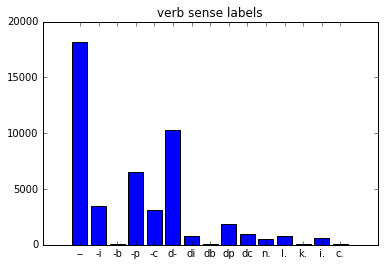

In [26]:
fig = plt.figure()
plt.bar(x, s, tick_label=senseLabels, align='center')
plt.title('verb sense labels')

# Sense label distribution per verb

We show the sense label distribution for the most frequent verbs.

First we need a function that plots a distribution, given a verb.
The verb is given by its lexeme.

In [78]:
x = range(len(senseLabels))

def getSenseDistr(lex):
    occurrences = [v for v in F.otype.s('word') if F.lex.v(v).rstrip('[=]') == lex]
    senseCount = collections.Counter()
    for v in occurrences:
        sense = F.sense.v(v)
        if not sense: sense = ''
        senseCount[sense] +=1



In [81]:
getSenseDistr('>MR')

5379
